<a href="https://colab.research.google.com/github/orenfix10/ML-project1/blob/main/Copy_of_NB_exercise_2023a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

## Write your id numbers and names here


1.   List item
2.   List item


## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we saw.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

to fetch the original data. Each image is a 28 by 28 pixels in grayscale range [0.255] and the corresponding label is an integer $y\in [0,9]$. Each image is should be transformed into a 1D integer array $x\in [0,255]^{784}$.

>```
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

Importing Packages


In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB

In [2]:
#Load the MNIST data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#fetch the original data
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

11490434/11490434 [==============================] - 1s 0us/step


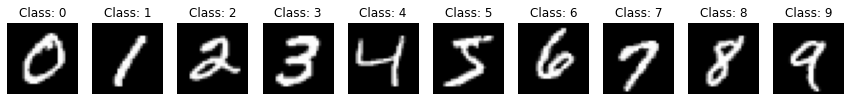

In [48]:
#Plot a single sample of each digit as the original image


for i in range(10):
    im_idx = np.argwhere(y_train == i)[0]
    plottable_image = np.reshape(x_train[im_idx], (28, 28))
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.imshow(plottable_image, cmap='gray')
    plt.rcParams['figure.figsize'] = [15, 15]
    plt.title(f"Class: {i}")




### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 
Describe in text (preferably math notationns) the classification rule, and explain.

**Note:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
Put you answer here...

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...

In [73]:
# Imports Answer 2
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics


In [43]:
# Fit Bernoulli NB 
def create_model():
  naive_bayes_model = BernoulliNB(binarize=0.0)
  naive_bayes_model.fit(x_train, y_train)
  return naive_bayes_model

naive_bayes_model = create_model()
y_pred = naive_bayes_model.predict(x_test)

BernoulliNB()

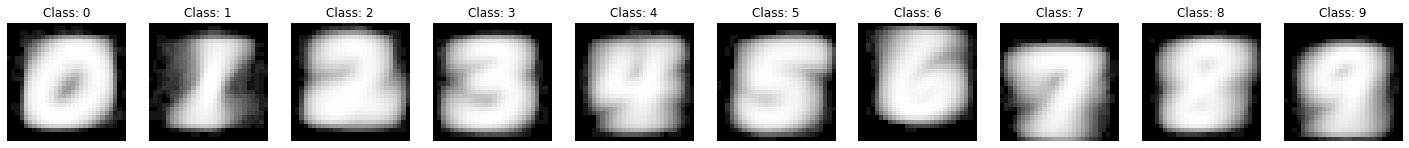

In [79]:
# 1. Plot the mean image of each class 
def plot_mean_images():
    per_digit_log_probabilities = naive_bayes_model.feature_log_prob_
    for i in range(10):
      plt.subplot(3, 10 , i +1)
      plt.imshow(per_digit_log_probabilities[i].reshape(28,28), cmap=plt.get_cmap('gray'))
      plt.title(f"Class: {i}")
      plt.rcParams['figure.figsize'] = [25, 25]
      plt.axis('off')
    plt.show()

plot_mean_images()


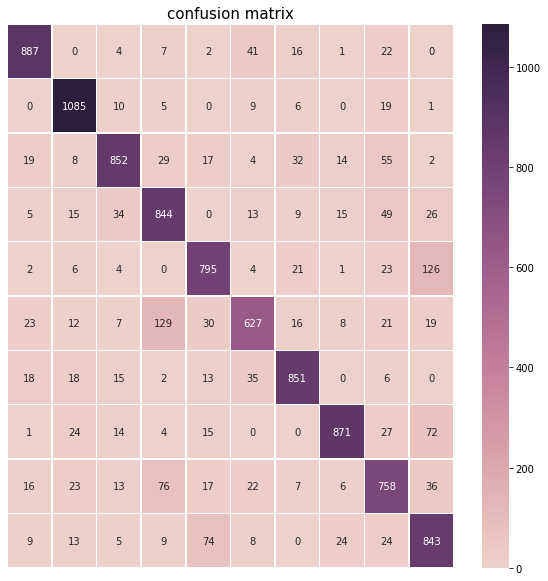

In [91]:
# 2. Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt="d", linewidth=.5)
plt.xlabel('Actual values', fontsize = 10)
plt.ylabel('Predict values', fontsize = 10)
plt.title('confusion matrix', fontsize = 15)
plt.axis('off')
plt.rcParams['figure.figsize'] = [10, 10]



In [80]:
# Calculate the total accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8413


 **Explanation:**

summarize the results in your own words:

We can see from the matrix that there are digits that their True prediction values are higher than other digits (Like 1, 0, and 7 compare to 4, 5, and 8). So, we can understand that the low values indicate that the shape of these digits is more complex to predict because there are multi or more complex ways to write them.
Also, it can be understood from the matrix that there are numbers that are probably more similar, so there are relatively many errors in their prediction (e.g., the classification of the number 3 as 5).

In [ ]:
# 3.Optimize threshold of the binarization part

We can use the histogram of the images. The histogram is a graph showing the number of pixels in an image at each different intensity value found in that image.

The pixels in an image that is suitable for thresholding have intensities clustered around two well-separated values.

It is suggested that the threshold for separating these two groups is somewhere between the two peaks shown in the histogram.

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_log_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


In [19]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report
from collections import Counter,defaultdict
import numpy as np

class NaiveBayes(BaseEstimator, ClassifierMixin):


 #get 2 parameters: 1. x- a matrix that saves for each word the number of times it appears in each post.
    # 2. y- an array with the actual class of each post.
  def fit(self, x, y):

    x =  x.toarray()
    docs_num, self.vocabulary_size = x.shape
    classes_count = Counter(y)

    # probability for a class (P(c))
    self.pClass = {classs: count / docs_num for classs, count in classes_count.items()}
    

    # probability of a word given a class (P(w,c)):
    self.classes = list(classes_count.keys())
    self.classes.sort()
    word_freq_by_class = {classs: np.zeros(self.vocabulary_size) for classs in self.classes}
    for classs in range(docs_num):
      word_freq_by_class[y[classs]] = [sum(i) for i in zip(x[classs], word_freq_by_class[y[classs]])]  

    # get the number of words for each class (Counter(c))  
    self.count_word_class = {key: sum(value) for key , value in word_freq_by_class.items()}

    #############
    classes_num = len(self.classes)
    word_freq_by_class = {c: np.zeros((self.vocabulary_size),dtype=np.float) for c in self.classes}
    self.word_prob_by_class = defaultdict(list)

    # calaculate count(w,c) -> the frequancy of each word  per class
    for d in range(docs_num):
      word_freq_by_class[y[d]] += x[d]

    # claculate the equation of p(w|c) = (count(w,c) + 1) / (count(c) + |V|)
    for c in self.classes:
      self.word_prob_by_class[c] = (word_freq_by_class[c] + 1) / (sum(word_freq_by_class[c])+self.vocabulary_size)
      #############################3


    # claculate the equation of p(w|c) = (count(w,c) + 1) / (count(c) + |V|)
    # self.word_prob_by_class = {}
    # for key, val in word_freq_by_class.items():
    #   for i in range(self.vocabulary_size):
    #     self.word_prob_by_class[(key,i)] = (word_freq_by_class[key][i] + 1) / (self.count_word_class[key] + self.vocabulary_size) 
   

    
  def predict_log_proba(self, x):
    final_pred_for_doc =[]  
    for doc in x:
      probs = []
      for classs in self.classes:
        
        prop_log =  np.log(self.pClass[classs])
        for word in range(self.vocabulary_size):
          prop_log += np.log(self.word_prob_by_class[(classs,word)])

        probs.append(prop_log)   
      final_pred_for_doc.append(probs)

    return final_pred_for_doc   

      
  def predict(self, x):
    probs = self.predict_log_proba(x.toarray())
    Class_pred = []
    for i in range(x.shape[0]):
        Class_pred.append(np.argmax(probs[i]))
    return Class_pred    



In [87]:
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter,defaultdict
import numpy as np

class NaiveBayes(BaseEstimator, ClassifierMixin):

  def fit(self, x, y):
    x =  x.toarray()
    docs_num, vocabulary_size = x.shape
    classes_count = Counter(y)
    self.vocabulary_size = x.shape[1]

    # probability for a class (P(c))
    classes_count = Counter(y)
    total = sum(classes_count.values())
    self.pClass = {classs: count / total for classs, count in classes_count.items()}



    # probability of a word given a class (P(w,c)):
    self.classes = list(classes_count.keys())
    self.classes.sort()
    word_freq_by_class = {classs: np.zeros((vocabulary_size),dtype=np.float) for classs in self.classes}
    for classs in range(docs_num):
      word_freq_by_class[y[classs]] += x[classs]
      # word_freq_by_class[y[classs]] = [sum(i) for i in zip(x[classs], word_freq_by_class[y[classs]])]  

    # get the number of words for each class (Counter(c))  
    self.count_word_class = {key: sum(value) for key , value in word_freq_by_class.items()}

    # claculate the equation of p(w|c) = (count(w,c) + 1) / (count(c) + |V|)
    self.word_prob_by_class = defaultdict(list)
    for c in self.classes:
      self.word_prob_by_class[c] = (word_freq_by_class[c] + 1) / (self.count_word_class[c]+vocabulary_size)


  def predict_log_proba(self, x):
    self.predicted_class_by_doc = defaultdict(list)
    for doc_index, doc in enumerate(x):
      word_prob_by_class_by_doc = []
      non_zeros_doc = list(np.nonzero(doc)[0])
      for c in self.classes:
        sum_of_probs = np.log(self.pClass[c])
        for i in non_zeros_doc:
          sum_of_probs += np.log(self.word_prob_by_class[c][i]) * doc[i]
        word_prob_by_class_by_doc.append(sum_of_probs)  
      self.predicted_class_by_doc[doc_index] = list(word_prob_by_class_by_doc)
    return self.predicted_class_by_doc  

    # find what is the class that is the cause of the maximal value and return it for each doc
       

  # using the prediction by the log proba func
  def predict(self, x):
    prob =  self.predict_log_proba(x.toarray())
    final_pred_for_doc = []
    for doc in prob:
      final_pred_for_doc.append(np.argmax(prob[doc])) 
    return list(final_pred_for_doc) 


# # calculate for each doc the probability of each class
#   def predict_log_proba(self, x):
#     word_prob_by_class_by_doc = {}
#     self.predicted_class_by_doc = defaultdict(list)
#     final_pred_for_doc =[]  
#     for  doc in range(x.shape[0]):
#       probs = []
#       for c in self.classes:
#         sum_of_probs = np.log(self.pClass[c])
#         for i in range(self.vocabulary_size):
#           sum_of_probs += np.log(self.word_prob_by_class[c][i]) * x[doc][i]
#         word_prob_by_class_by_doc[c] = sum_of_probs 
#       self.predicted_class_by_doc[doc] = list(word_prob_by_class_by_doc.values())


#   #   # find what is the class that is the cause of the maximal value and return it for each doc
#       # find what is the class that is the cause of the maximal value and return it for each doc
#     final_pred_for_doc = {}
#     for doc in self.predicted_class_by_doc:
#       final_pred_for_doc[doc] = np.argmax(self.predicted_class_by_doc[doc])
#     return list(final_pred_for_doc.values())    

#   # using the prediction by the log proba func
#   def predict(self, x):
#     return self.predict_log_proba(x.toarray())


  #   Class_pred = []
  #   for i in range(x.shape[0]):
  #        Class_pred.append(np.argmax(final_pred_for_doc[i]))
  #   return Class_pred     
    
  # def predict(self, x):
  #   return self.predict_log_proba(x.toarray())
    
  # def predict(self, x):
  #   probs = self.predict_log_proba(x.toarray())
  #   Class_pred = []
  #   for i in range(x.shape[0]):
  #       Class_pred.append(np.argmax(probs[i]))
  #   return Class_pred    
    
  #using the prediction by the log proba func

  # def predict_log_proba(self, x):
  #   word_prob_by_class_by_doc = {}
  #   self.predicted_class_by_doc = defaultdict(list)
  #   final_pred_for_doc =[]  
  #   for doc in x:
  #     probs = []
  #     for classs in self.classes:
  #       prop_log =  np.log(self.pClass[classs])
  #       for word in range(self.vocabulary_size):
  #         prop_log += np.log(self.word_prob_by_class[classs][word])
  #       probs.append(prop_log)   
      # self.predicted_class_by_doc[doc_index] = list(word_prob_by_class_by_doc.values())    

  
    #   final_pred_for_doc.append(probs)

    # return final_pred_for_doc  

     
  # def predict(self, x):
  #   probs = self.predict_log_proba(x.toarray())
  #   Class_pred = []
  #   for i in range(x.shape[0]):
  #       Class_pred.append(np.argmax(probs[i]))
  #   return Class_pred    


In [88]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
# build a pipeline 
import warnings


our_naive_bayes_model = NaiveBayes()
pipline = make_pipeline(vectorizer, our_naive_bayes_model)
pipline.fit(X_train, Y_train)
# predict over test set and calculate the accuracy 
Y_pred = pipline.predict(X_test)

print("our naive bayes accuracy: ", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

our naive bayes accuracy:  0.4626925119490175
              precision    recall  f1-score   support

           0       0.29      0.42      0.34       319
           1       0.44      0.57      0.50       389
           2       0.00      0.00      0.00       394
           3       0.39      0.47      0.43       392
           4       0.44      0.50      0.47       385
           5       0.60      0.55      0.58       395
           6       0.75      0.70      0.73       390
           7       0.48      0.56      0.52       396
           8       0.41      0.53      0.47       398
           9       0.48      0.58      0.53       397
          10       0.31      0.38      0.34       399
          11       0.75      0.55      0.63       396
          12       0.38      0.40      0.39       393
          13       0.47      0.46      0.46       396
          14       0.69      0.46      0.55       394
          15       0.48      0.58      0.53       398
          16       0.45      0.44  

In [1]:
# load data
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score, classification_report
# split the data to train and test
# categories = ['misc.forsale','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']

newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'), shuffle=True)
newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'), shuffle=True)

X_train = newsgroups_train.data
X_test = newsgroups_test.data
Y_train = newsgroups_train.target
Y_test =  newsgroups_test.target

from sklearn.feature_extraction.text import CountVectorizer
# building the vocabulary
vectorizer = CountVectorizer(analyzer='word' ,stop_words='english', min_df=0.001, max_df=0.9, max_features =1000) 
x_train_count = vectorizer.fit_transform(X_train)
x_test_count = vectorizer.transform(X_test)

In [5]:
#download the data
categories = ['misc.forsale','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'), shuffle=True, categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'), shuffle=True, categories=categories)

#split to train data
X_train = newsgroups_train.data
Y_train = newsgroups_train.target

#split to test data
X_test = newsgroups_test.data
Y_test =  newsgroups_test. target

#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [ ]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [57]:
from sklearn.pipeline import make_pipeline

# Using our naive bayes model

our_naive_bayes_model = NaiveBayes()
# chain the vectroizer and our model 
pipline = make_pipeline(vectorizer, our_naive_bayes_model)
pipline.fit(X_train, Y_train)
# predict over test set and calculate the accuracy 
Y_pred = pipline.predict(X_test)

print("our naive bayes accuracy: ", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

self.classes [dict_keys([2, 1, 4, 3, 0])]
{2: 0.20107599193006054, 1: 0.19973100201748487, 4: 0.20174848688634836, 3: 0.2007397444519166, 0: 0.19670477471418965}
[0, 1, 2, 3, 4]


KeyboardInterrupt: ignored

In [ ]:
# Implementationn goes here

#### Think and describe:
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

Answer goes here